In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import Phrases
from gensim.corpora import Dictionary
import nltk

# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



In [4]:
df_final = pd.read_csv("../data/csv/df_final.csv")
df_final.head()

,paperId,docType,keywords,keywordsPlus,subjectSub1,subjectCat1,subjectCatExt,categoryHeading,abstract,year,...,title,country,location,orgNames,orgEnhanced1,orgEnhancedAll,fullName,researcherId,authorSeq,firstAuthorSource
0,WOS:000400551000003,Article,"computational materials science,nanostructures...",NaN,Technology,"Materials Science, Multidisciplinary",Materials Science,Science & Technology,Nanomaterial-based ultra-low-energy device des...,2016,...,Towards quantum dot and device implementation ...,India,NaN,West Bengal Univ Technol,Maulana Abul Kalam Azad University of Technology,Maulana Abul Kalam Azad University of Technology,"Purkayastha, Tamoghna",FSQ-0224-2022,1,seq1_unique
1,WOS:000400701200001,Article,NaN,NaN,Physical Sciences,"Physics, Applied",Physics,Science & Technology,A challenge for constructing large circuits of...,2016,...,Universal Gate for Fixed-Frequency Qubits via ...,USA,AP,IBM TJ Watson Res Ctr,International Business Machines (IBM),International Business Machines (IBM);IBM USA,"McKay, David C.",GWM-2403-2022,1,seq1_unique
2,WOS:000399549500014,Article,NaN,"PASTA-ULAM PROBLEM,1-F NOISE,THERMAL AGITATION...",Technology,"Computer Science, Theory & Methods","Computer Science,Instruments & Instrumentation...",Science & Technology,Fluctuations with 1/f spectrum stand for the f...,2016,...,On the 1/f Noise and Energy Partition in Solid,Romania,AC,IMT Bucharest,National Institute Research & Development Micr...,National Institute Research & Development Micr...,"Mihaila, M.",FKV-4690-2022,1,seq1_unique
3,WOS:000397944800010,Article,"Quantum Key Distribution,Bell States,Quantum C...","PRIVACY AMPLIFICATION,CRYPTOGRAPHY,INFORMATION...",Technology,"Computer Science, Information Systems",Computer Science,Science & Technology,A quantum key distribution protocol with tradi...,2016,...,Semi-quantum Key Distribution Protocol Based o...,Peoples R China,AC,Shenzhen Univ,Shenzhen University,Shenzhen University,"Wang, Ting",JUD-9931-2023,1,seq1_unique
4,WOS:000398221800009,Article,"quantum cryptography,authentication,key distri...",NaN,Technology,"Computer Science, Information Systems","Computer Science,Telecommunications",Science & Technology,"In this paper, we review a previous research p...",2016,...,Upgrade of a quantum scheme for authentication...,Tunisia,NaN,Natl Engn Sch Tunis,Universite de Tunis-El-Manar,Universite de Tunis-El-Manar;Ecole Nationale d...,"Ghilen, Aymen",GAU-3999-2022,1,seq1_unique


Publications per year:
 year
2007     598
2008     621
2009     809
2010     797
2011     831
2012     903
2013     989
2014    1185
2015    1298
2016    1540
2017    1557
2018    1826
2019    2223
2020    2715
2021    3066
2022    3571
2023    3504
Name: count, dtype: int64


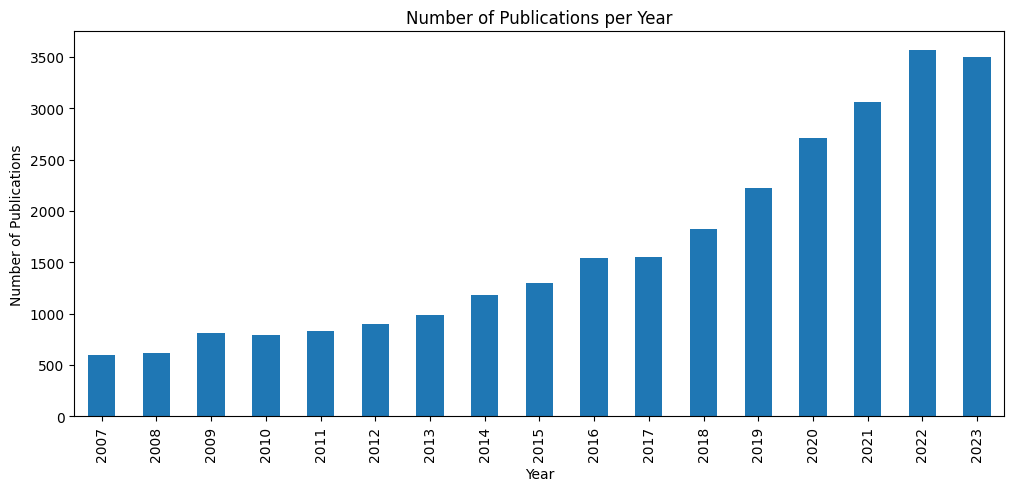

Abstract length stats:
 count    28033.000000
mean       156.802483
std         57.680272
min          1.000000
25%        119.000000
50%        150.000000
75%        188.000000
max       1219.000000
Name: abstract_word_count, dtype: float64


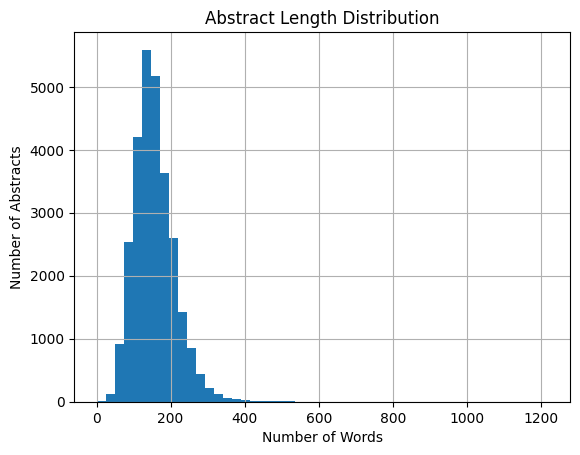

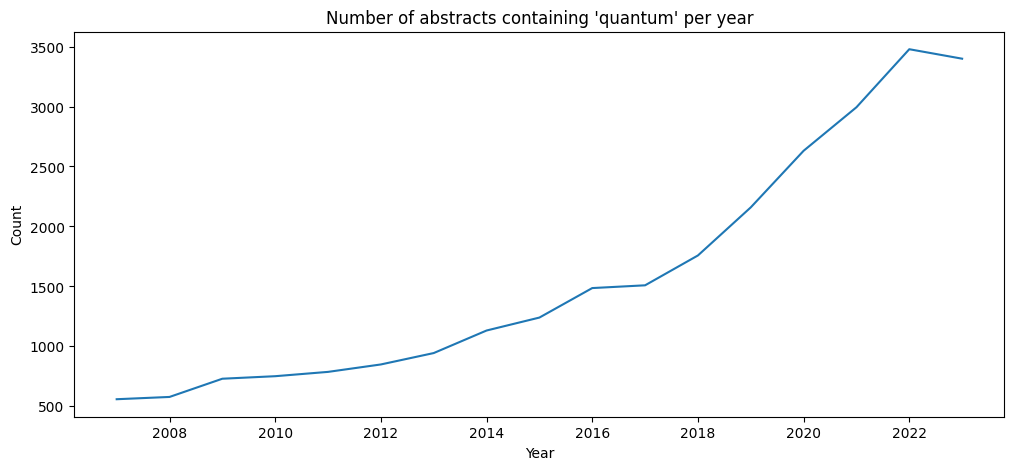

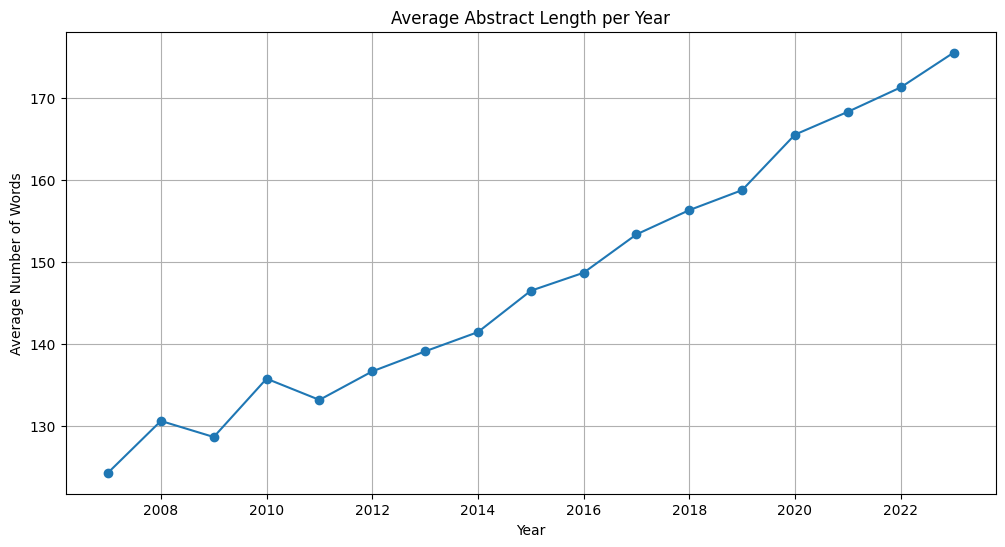

In [7]:
# ---------- Raw text analyses ----------

# Number of publications per year
pubs_per_year = df_final['year'].value_counts().sort_index()
print("Publications per year:\n", pubs_per_year)

pubs_per_year.plot(kind='bar', figsize=(12,5))
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

# Abstract length stats (raw text)
df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))
print("Abstract length stats:\n", df_final['abstract_word_count'].describe())

df_final['abstract_word_count'].hist(bins=50)
plt.title('Abstract Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Abstracts')
plt.show()

# Keyword frequency over years (raw text)
keyword = 'quantum'
df_final['contains_keyword'] = df_final['abstract'].str.contains(keyword, case=False, na=False)
keyword_counts = df_final.groupby('year')['contains_keyword'].sum()

keyword_counts.plot(figsize=(12,5))
plt.title(f"Number of abstracts containing '{keyword}' per year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))

# Calculate average abstract length per year
avg_length_per_year = df_final.groupby('year')['abstract_word_count'].mean()
# Plot
plt.figure(figsize=(12, 6))
avg_length_per_year.plot(marker='o')
plt.title('Average Abstract Length per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Words')
plt.grid(True)
plt.show()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of unique tokens after filtering: 9043
Number of documents: 28033
Average unique tokens per abstract per year:
 year
2007    65.267559
2008    67.091787
2009    67.291718
2010    70.740276
2011    69.944645
2012    71.791805
2013    73.173913
2014    73.634599
2015    76.510015
2016    78.025974
2017    80.160565
2018    81.906900
2019    83.172740
2020    86.335175
2021    87.549902
2022    88.584990
2023    90.978881
Name: unique_tokens_count, dtype: float64


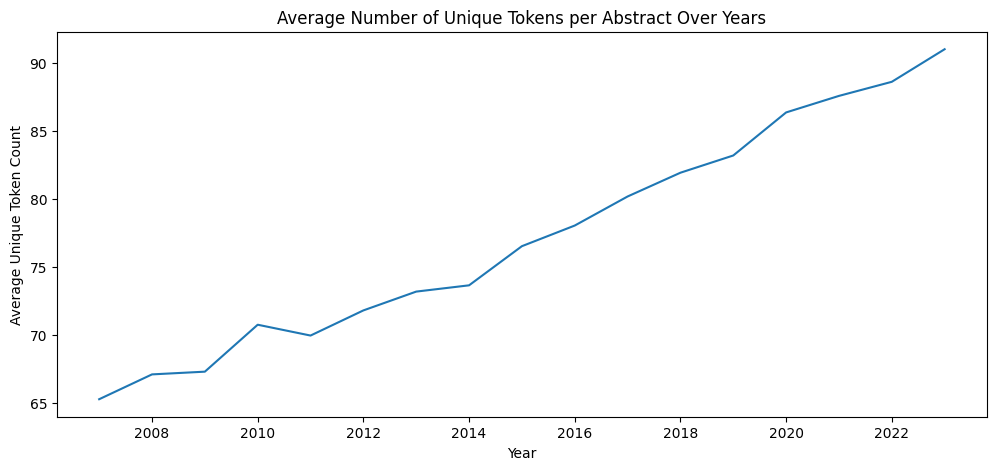

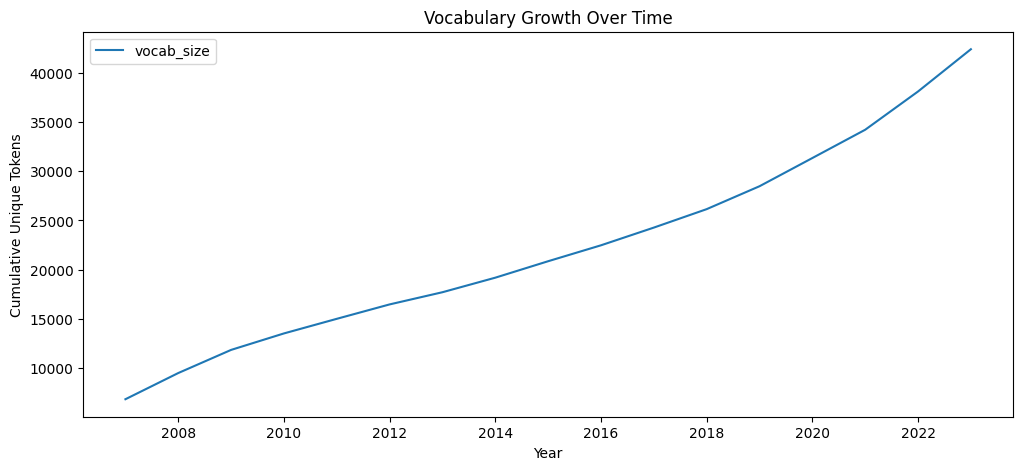

Number of publications per year:
 year
2007     598
2008     621
2009     809
2010     797
2011     831
2012     903
2013     989
2014    1185
2015    1298
2016    1540
2017    1557
2018    1826
2019    2223
2020    2715
2021    3066
2022    3571
2023    3504
Name: count, dtype: int64


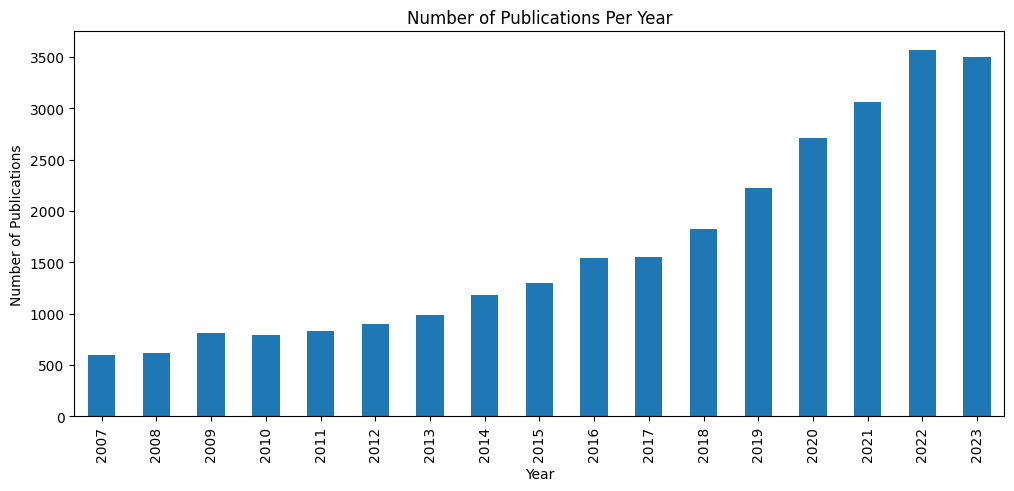

Average abstract length per year:
 year
2007    124.275920
2008    130.597424
2009    128.635352
2010    135.755332
2011    133.166065
2012    136.646733
2013    139.092012
2014    141.443038
2015    146.486903
2016    148.687662
2017    153.368015
2018    156.330230
2019    158.771030
2020    165.547330
2021    168.330724
2022    171.310277
2023    175.543950
Name: abstract_word_count, dtype: float64


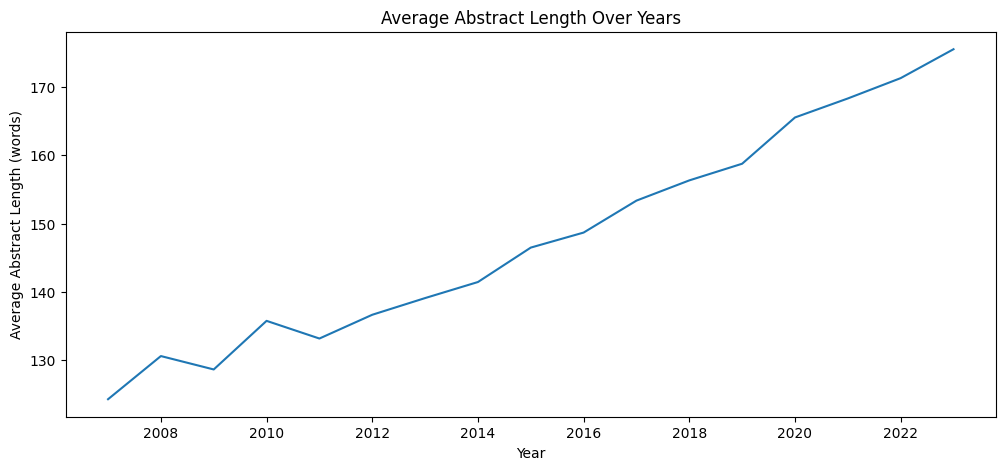

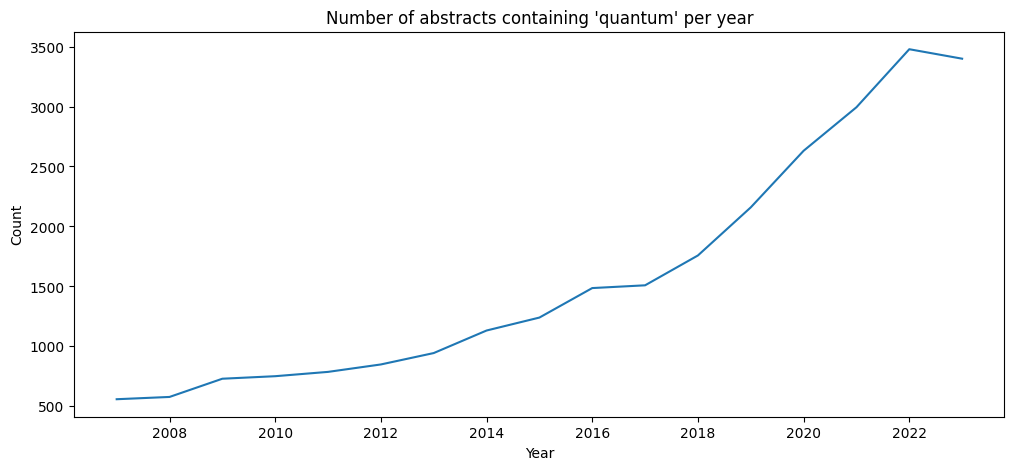

In [8]:
# Initialize tokenizer, lemmatizer, stopwords
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if pd.isna(text):
        return []
    tokens = tokenizer.tokenize(text.lower())
    tokens = [t for t in tokens if not t.isnumeric()]       # Remove pure numbers
    tokens = [t for t in tokens if len(t) > 1]              # Remove 1-char tokens
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return tokens

# Preprocess abstracts (base tokens)
docs = df_final['abstract'].apply(preprocess).tolist()
df_final['tokens'] = docs  # base tokens without n-grams

# Build bigrams model (min_count=20)
bigram = Phrases(docs, min_count=20, threshold=10)

# Append bigrams to documents
docs_with_bigrams = []
for doc in docs:
    bigrams_in_doc = [token for token in bigram[doc] if '_' in token]
    docs_with_bigrams.append(doc + bigrams_in_doc)

# Train trigram model (min_count=20)
trigram = Phrases(docs_with_bigrams, min_count=20, threshold=10)

# Append trigrams to documents
docs_with_trigrams = []
for doc in docs_with_bigrams:
    trigrams_in_doc = [token for token in trigram[doc] if '_' in token]
    docs_with_trigrams.append(doc + trigrams_in_doc)

# Add final tokens (with bigrams & trigrams) to dataframe
df_final['final_tokens'] = docs_with_trigrams

# Create dictionary and filter extremes
dictionary = Dictionary(docs_with_trigrams)
dictionary.filter_extremes(no_below=20, no_above=0.3)

# Create bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in docs_with_trigrams]

print(f"Number of unique tokens after filtering: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")

# ---------- Analysis ----------

# Number of unique words per abstract (after preprocessing with n-grams)
df_final['unique_tokens_count'] = df_final['final_tokens'].apply(lambda x: len(set(x)))

unique_tokens_per_year = df_final.groupby('year')['unique_tokens_count'].mean()
print("Average unique tokens per abstract per year:\n", unique_tokens_per_year)

unique_tokens_per_year.plot(figsize=(12,5))
plt.title('Average Number of Unique Tokens per Abstract Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unique Token Count')
plt.show()

# Vocabulary growth over time (cumulative unique tokens including n-grams)
vocab = set()
vocab_growth = []

for year in sorted(df_final['year'].unique()):
    tokens_year = df_final.loc[df_final['year'] == year, 'final_tokens'].sum()
    vocab.update(tokens_year)
    vocab_growth.append({'year': year, 'vocab_size': len(vocab)})

vocab_growth_df = pd.DataFrame(vocab_growth)

vocab_growth_df.plot(x='year', y='vocab_size', figsize=(12,5))
plt.title('Vocabulary Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Unique Tokens')
plt.show()

# Number of publications per year (raw data)
pubs_per_year = df_final['year'].value_counts().sort_index()
print("Number of publications per year:\n", pubs_per_year)

pubs_per_year.plot(kind='bar', figsize=(12,5))
plt.title('Number of Publications Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

# Abstract length per year (raw text)
df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))
abstract_length_per_year = df_final.groupby('year')['abstract_word_count'].mean()
print("Average abstract length per year:\n", abstract_length_per_year)

abstract_length_per_year.plot(figsize=(12,5))
plt.title('Average Abstract Length Over Years')
plt.xlabel('Year')
plt.ylabel('Average Abstract Length (words)')
plt.show()

# Keyword frequency over years (raw text, case-insensitive)
keyword = 'quantum'
df_final['contains_keyword'] = df_final['abstract'].str.contains(keyword, case=False, na=False)
keyword_counts = df_final.groupby('year')['contains_keyword'].sum()

keyword_counts.plot(figsize=(12,5))
plt.title(f"Number of abstracts containing '{keyword}' per year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
